In [1]:
!git clone https://github.com/suridian/DeepAdversarialLearning.git

Cloning into 'DeepAdversarialLearning'...
remote: Enumerating objects: 74, done.
remote: Total 74 (delta 0), reused 0 (delta 0), pack-reused 74
Unpacking objects: 100% (74/74), done.


In [2]:
%cd /content/DeepAdversarialLearning

/content/DeepAdversarialLearning


In [3]:
!pip install dominate
!pip install scipy==1.1.0
!pip install pytorch torchvision cudatoolkit==10.1 
!pip install visdom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 31.2 MB 1.3 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pymc3 3.11.4 requires scipy>=1.2.0, but you have scipy 1.1.0 which is incompatible.
plotnine 0.6.0 requires scipy>=1.2.0, but you have scipy 1.1.0 which is incompatible.
jax 0.3.8 requires scipy>=1.2.1, but you have scipy 1.1.0 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.d

In [13]:
from IPython.display import Image

#Delete semua file dengan format .pyc

In [4]:
list_pyc=["/content/DeepAdversarialLearning/options","/content/DeepAdversarialLearning/util"]

In [5]:
import os

for name in list_pyc:
  dir_name = name
  test = os.listdir(dir_name)

  for item in test:
      if item.endswith(".pyc"):
          os.remove(os.path.join(dir_name, item))

#Training

##Generate Synthetic Images

In [6]:
!python train.py --dataroot "/content/DeepAdversarialLearning/datasets/Nuclei_Histopatology" --name NU_SEG  --gpu_ids 0 --display_id 0 --lambda_L1 70 --niter 200 --niter_decay 200 --pool_size 64 --loadSize 256 --fineSize 256

----------------- Options ---------------
                batchSize: 1                             
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                 dataroot: /content/DeepAdversarialLearning/datasets/Nuclei_Histopatology	[default: None]
             dataset_mode: aligned                       
             display_freq: 400                           
               display_id: 0                             	[default: 1]
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
              epoch_count: 1                             
                 fineSize: 256                           
                  gpu_ids: 0                             
                init_gain: 

###Output at epoch400

In [27]:
epoch400_fakeB = "/content/DeepAdversarialLearning/checkpoints/NU_SEG/web/images/epoch400_fake_B.png"
epoch400_realA = "/content/DeepAdversarialLearning/checkpoints/NU_SEG/web/images/epoch400_real_A.png"
epoch400_realB = "/content/DeepAdversarialLearning/checkpoints/NU_SEG/web/images/epoch400_real_B.png"

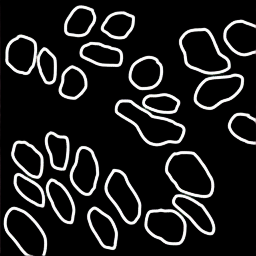

In [15]:
Image(epoch400_fakeB)

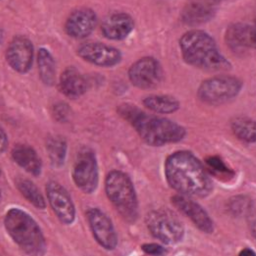

In [10]:
Image(epoch400_realA)

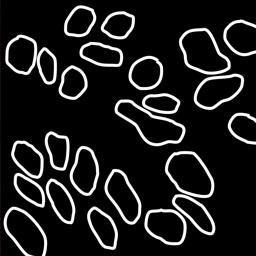

In [16]:
Image(epoch400_realB)

#Testing

In [7]:
!python test.py --dataroot "/content/DeepAdversarialLearning/datasets/Nuclei_Histopatology" --name NU_SEG --gpu_ids 0 --display_id 0 --loadSize 256 --fineSize 256

----------------- Options ---------------
             aspect_ratio: 1.0                           
                batchSize: 1                             
          checkpoints_dir: ./checkpoints                 
                 dataroot: /content/DeepAdversarialLearning/datasets/Nuclei_Histopatology	[default: None]
             dataset_mode: single                        
               display_id: 0                             	[default: 1]
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                 fineSize: 256                           
                  gpu_ids: 0                             
                 how_many: 50                            
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: 

###synthetic images from test image: 10_real_A

In [32]:
fake10_B = "/content/DeepAdversarialLearning/results/NU_SEG/test_latest/images/10_fake_B.png"
real10_A = "/content/DeepAdversarialLearning/results/NU_SEG/test_latest/images/10_real_A.png"

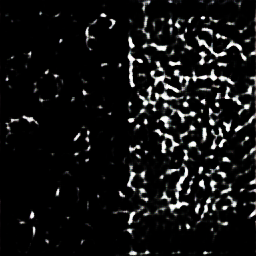

In [21]:
Image(fake10_B)

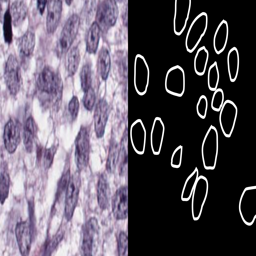

In [19]:
Image(real10_A)

#Image segmentation

###pix2pix training

In [22]:
!python train.py --dataroot "/content/DeepAdversarialLearning/datasets/Nuclei_Histopatology" --name NU_SEG  --gpu_ids 0 --display_id 0 --lambda_L1 70 --niter 200 --niter_decay 200 --pool_size 64 --loadSize 256 --fineSize 256

----------------- Options ---------------
                batchSize: 1                             
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                 dataroot: /content/DeepAdversarialLearning/datasets/Nuclei_Histopatology	[default: None]
             dataset_mode: aligned                       
             display_freq: 400                           
               display_id: 0                             	[default: 1]
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
              epoch_count: 1                             
                 fineSize: 256                           
                  gpu_ids: 0                             
                init_gain: 

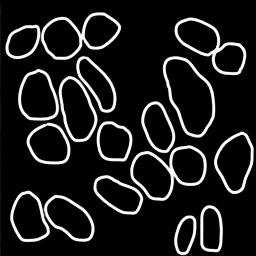

In [28]:
Image(epoch400_fakeB)

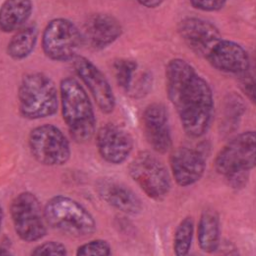

In [29]:
Image(epoch400_realA)

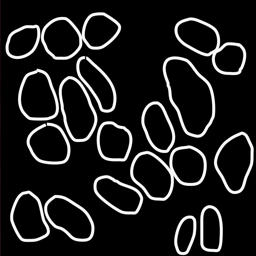

In [30]:
Image(epoch400_realB)

###pix2pix testing

In [31]:
!python test.py --dataroot "/content/DeepAdversarialLearning/datasets/Nuclei_Histopatology" --name NU_SEG --gpu_ids 0 --display_id 0 --loadSize 256 --fineSize 256

----------------- Options ---------------
             aspect_ratio: 1.0                           
                batchSize: 1                             
          checkpoints_dir: ./checkpoints                 
                 dataroot: /content/DeepAdversarialLearning/datasets/Nuclei_Histopatology	[default: None]
             dataset_mode: single                        
               display_id: 0                             	[default: 1]
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                 fineSize: 256                           
                  gpu_ids: 0                             
                 how_many: 50                            
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: 

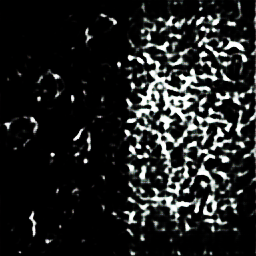

In [33]:
Image(fake10_B)

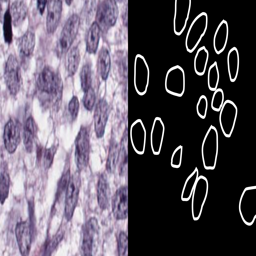

In [34]:
Image(real10_A)

In [35]:
fake9_B = "/content/DeepAdversarialLearning/results/NU_SEG/test_latest/images/9_fake_B.png"
real9_A = "/content/DeepAdversarialLearning/results/NU_SEG/test_latest/images/9_real_A.png"

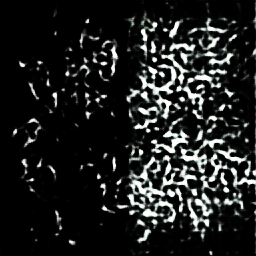

In [36]:
Image(fake9_B)

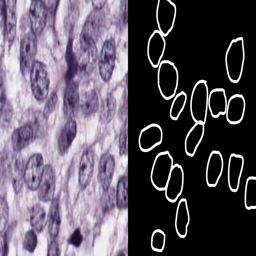

In [37]:
Image(real9_A)